In [1]:
import sys
sys.path.insert(0,'../../')
from src.analysis.model_performances import *
from helpers import *

In [15]:
answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = ACCURACY_SCORE_KEY#F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = F1_SCORE_KEY)

ids_file_name = f'dataset_ids.test'  # None
save_main_dir = f'{STATISTICS_PATH}.{ids_file_name}'
stats_all = collect_stats_all(tf_answer_type(score_key = score_key), save_main_dir=save_main_dir)

save_dir = os.path.join(STATISTICS_PATH, 'plots', 'by_subs')
os.makedirs(save_dir, exist_ok=True)

100%|██████████| 34560/34560 [00:03<00:00, 10899.40it/s]


In [16]:
model_name = 'gemini'#'Llama-2-7b-chat-hf'#'gemma-2b-it' #'Llama-2-13b-chat-hf' #
prompt_type = 'few_shot_1'
plan_length = 19
question_category = ALL_QUESTION_CATEGORIES_KEY
domain = ALL_DOMAINS_KEY
categories = SUBSTITUTION_TYPES

# By ramifications

by prompt type, gemini, few shot 1, ALL DOMAINS, pl-19


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

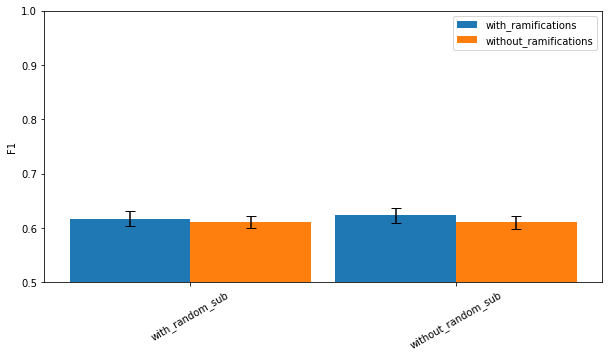

In [17]:
data_all = []
for ramifications in RAMIFICATION_TYPES:
    plt.figure()
    data = {NAME_KEY: ramifications, DATA_KEY: [], ERROR_KEY: []}
    for subs in categories:
        res = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs) 
        if res:
            data[DATA_KEY].append(res[SK_RESULT])
            data[ERROR_KEY].append(res[SK_RESULT_OTHER]['sem'])
        else:
            data[DATA_KEY].append(None)
            data[ERROR_KEY].append(None)
    data_all.append(data)

plt_n_bars(categories, data_all)
plt.ylabel('F1')
plt.ylim([0.5,1])
save_name =  f'by_prompt_type.{model_name}.{prompt_type}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')

print(save_name.replace('.',', ').replace('_',' '))

In [7]:
res

{'result': 0.601356260595786,
 'stats': {'num_original': 12411,
  'num_corrupted': 24,
  'num_not_corrupted': 12387,
  'both_present': 0,
  'both_absent': 2,
  'both_present_%': 0.0,
  'both_absent_%': 0.0001614595947364172},
 'model': 'gemini',
 'prompt_type': 'few_shot_1',
 'ramification_type': 'with_ramifications',
 'substitution_type': 'with_random_sub',
 'domain_name': 'ALL_DOMAINS',
 'plan_length': 19,
 'question_category': 'ALL_CATEGORIES',
 'answer_type': 'true_false_answer'}